##HR Analytics: Job Change Prediction

This project contains data about an MNC which is active in Big Data and Data
Science. The Organization wants to hire Data Scientists among candidates who
successfully passed some of the courses which are being offered by the company.
Many people signup for their training. The Organization wants to know which of
these candidates really wants to work for the company after training or will look for
a new employment, because this analysis helps to reduce the cost and time as well
as the quality of training or planning the courses and categorization of candidates.


In [22]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# Load the dataset
data=pd.read_csv('aug_train.csv')

In [24]:
data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [25]:
data.tail()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0
19157,23834,city_67,0.855,NaN,No relevent experience,no_enrollment,Primary School,NaN,2,NaN,NaN,1,127,0.0


In [26]:
# Display basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [27]:
data.describe(include='all')

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
count,19158.000000,19158,19158.000000,14650,19158,18772,18698,16345,19093,13220,13018,18735,19158.000000,19158.000000
unique,NaN,123,NaN,3,2,3,5,6,22,8,6,6,NaN,NaN
top,NaN,city_103,NaN,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,NaN,NaN
freq,NaN,4355,NaN,13221,13792,13817,11598,14492,3286,3083,9817,8040,NaN,NaN
mean,16875.358179,NaN,0.828848,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.366896,0.249348
std,9616.292592,NaN,0.123362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.058462,0.432647
min,1.000000,NaN,0.448000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000
25%,8554.250000,NaN,0.740000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.000000,0.000000
50%,16982.500000,NaN,0.903000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.000000,0.000000
75%,25169.750000,NaN,0.920000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88.000000,0.000000


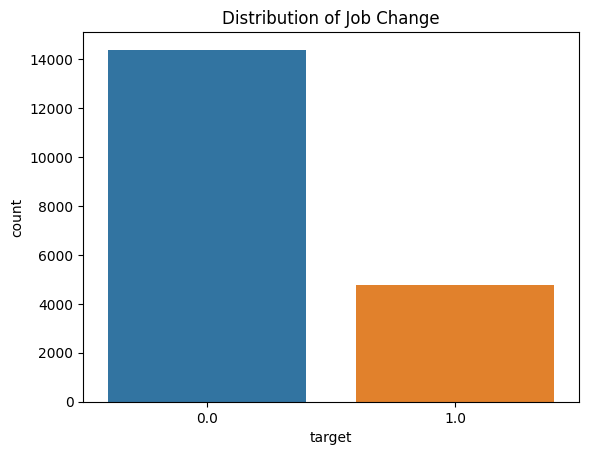

In [28]:
# Visualize the distribution of the target variable
sns.countplot(x='target', data=data)
plt.title('Distribution of Job Change')
plt.show()

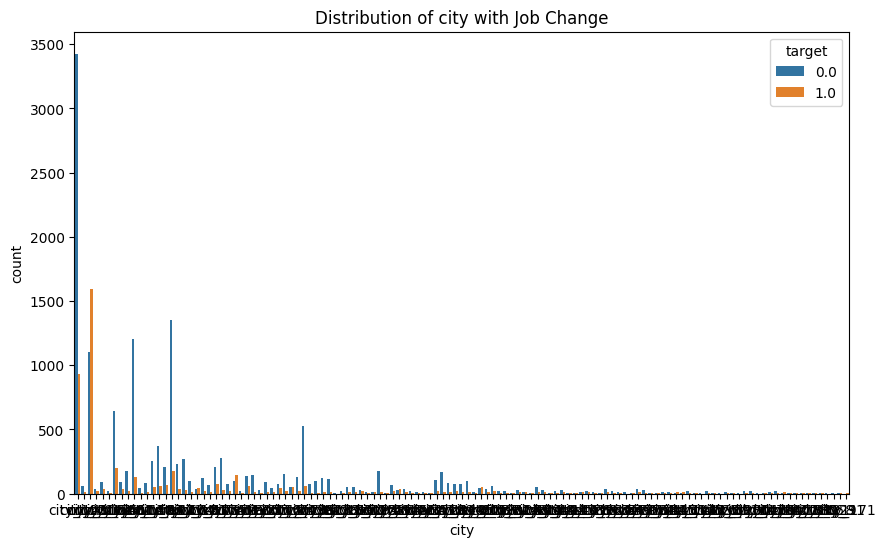

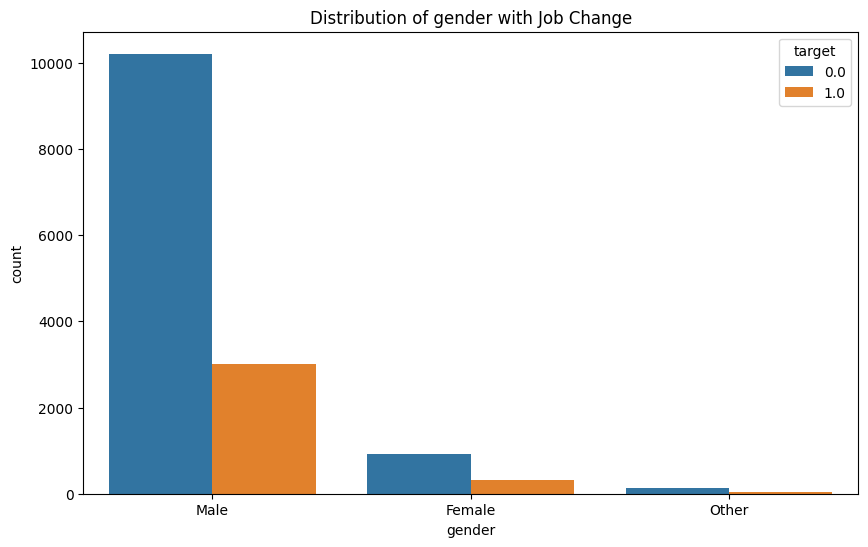

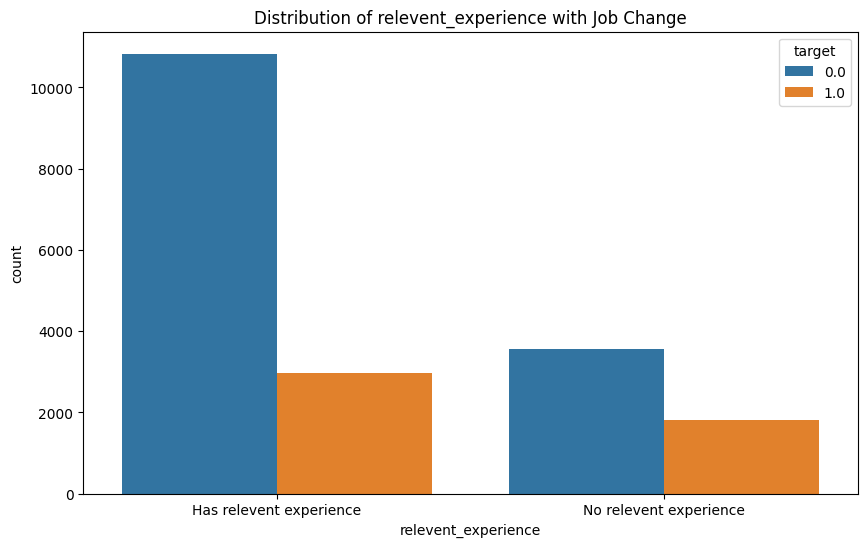

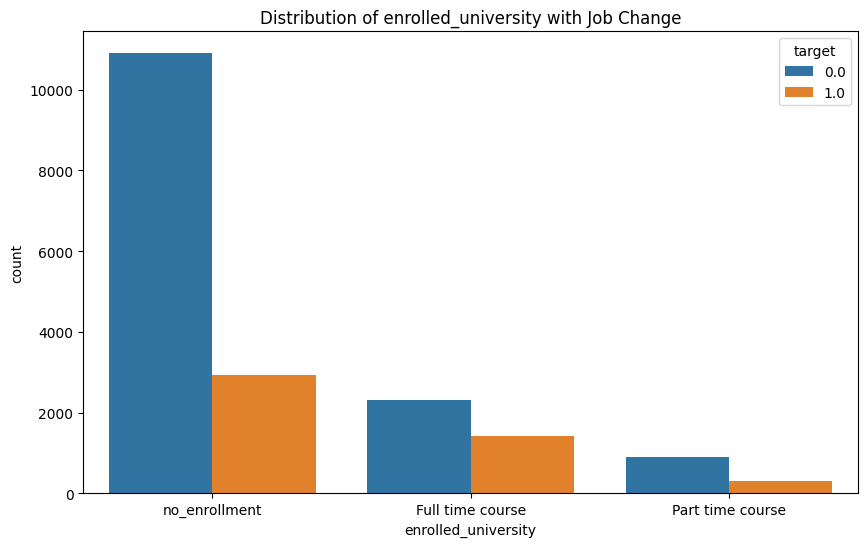

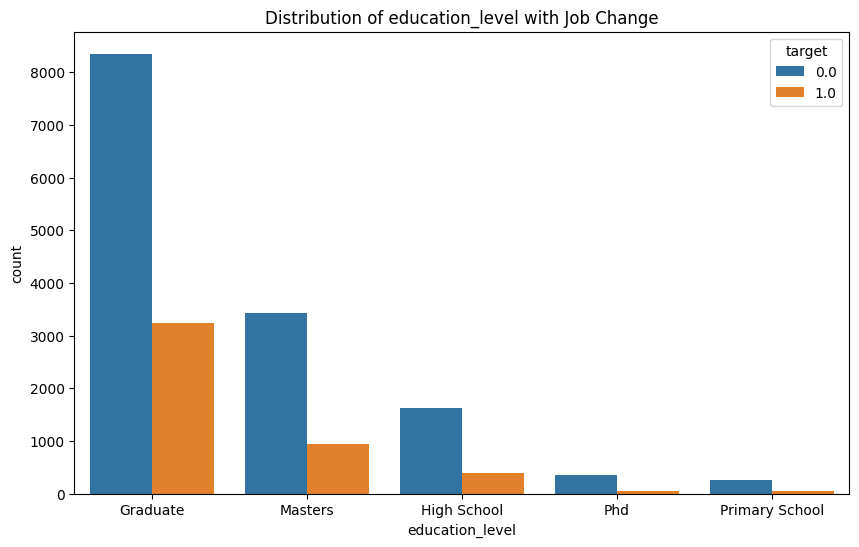

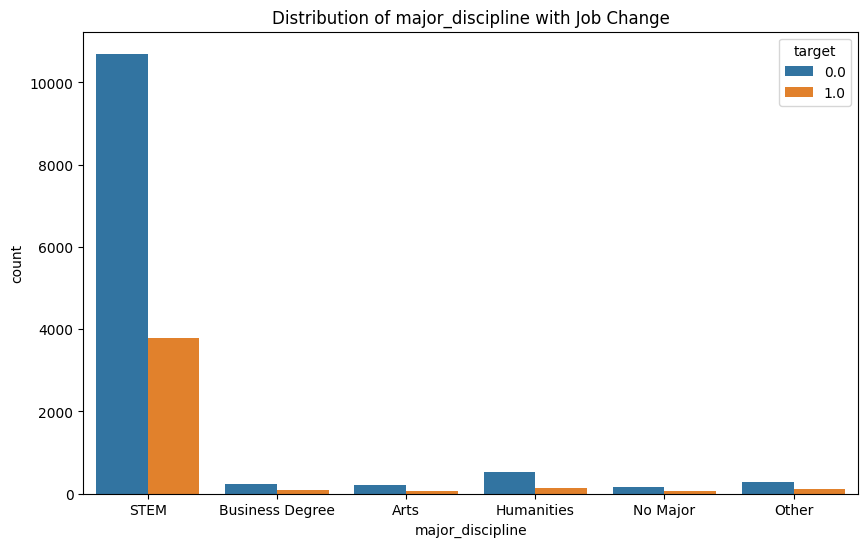

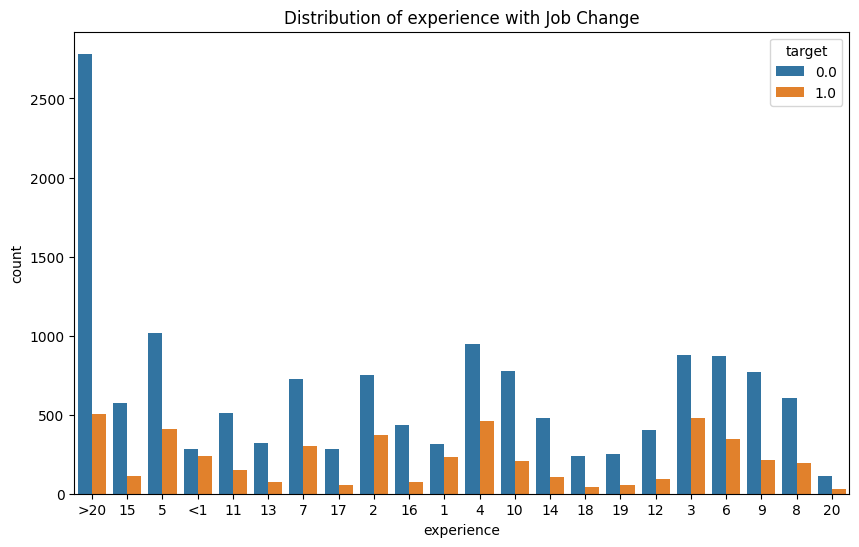

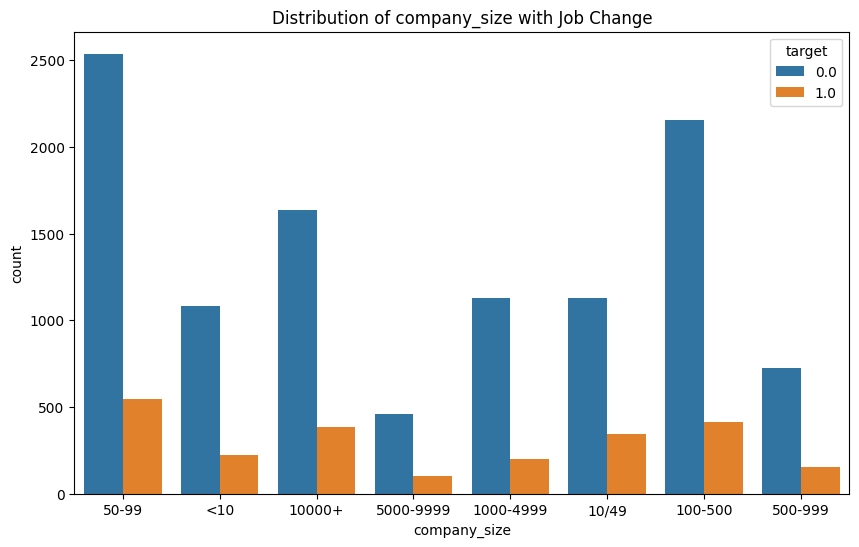

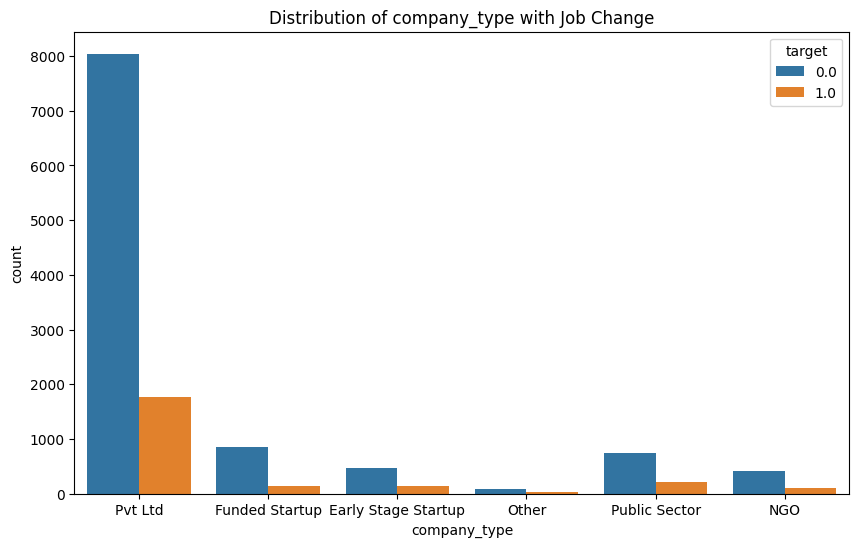

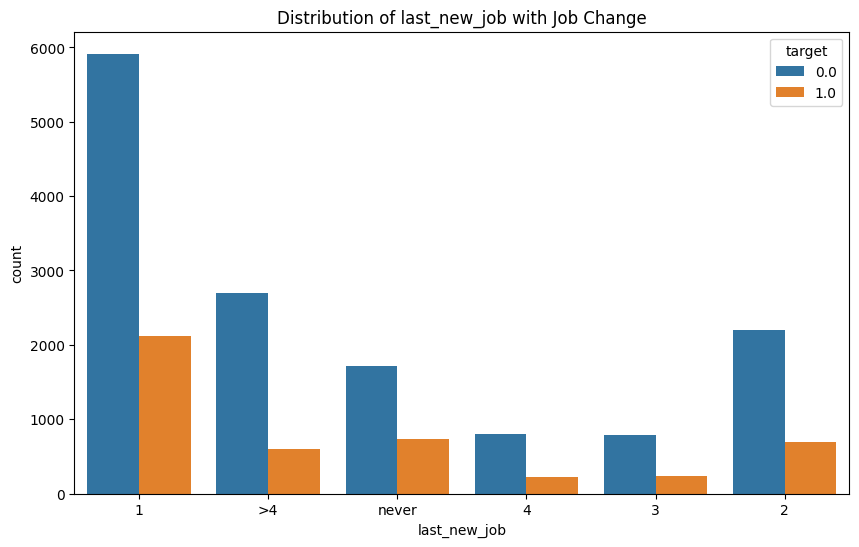

In [29]:
# Explore categorical variables
categorical_columns = data.select_dtypes(include=['object']).columns

for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column , hue='target', data=data)
    plt.title(f'Distribution of {column} with Job Change')
    plt.show()

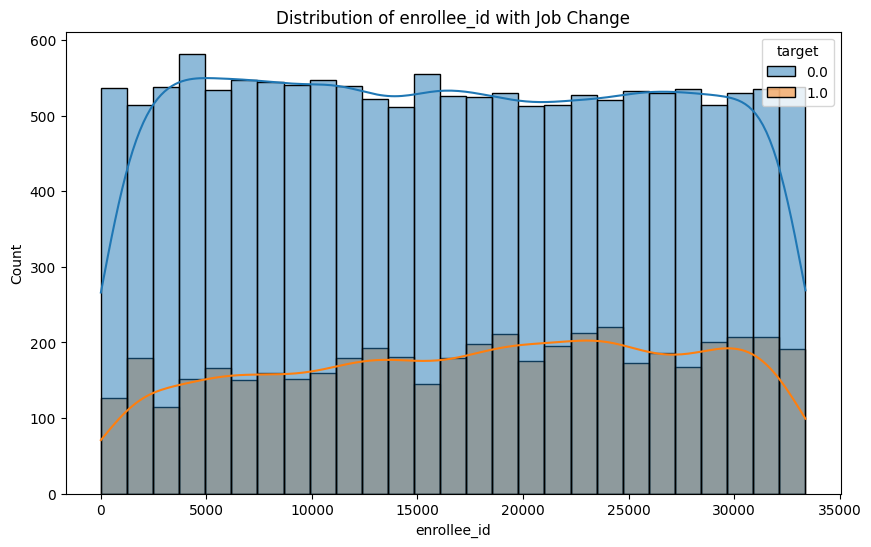

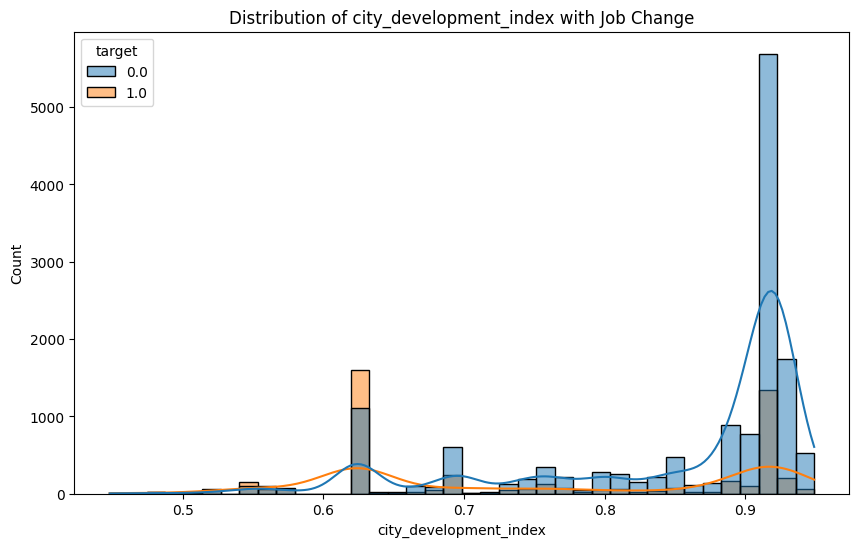

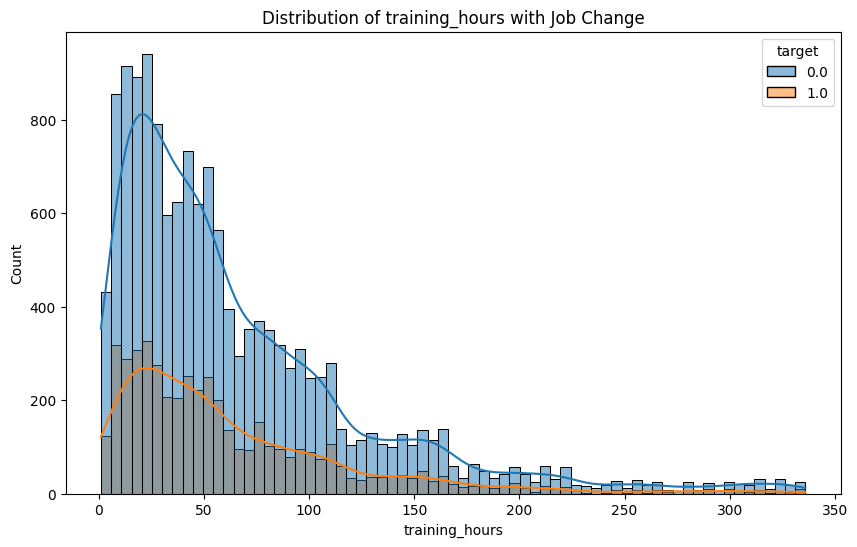

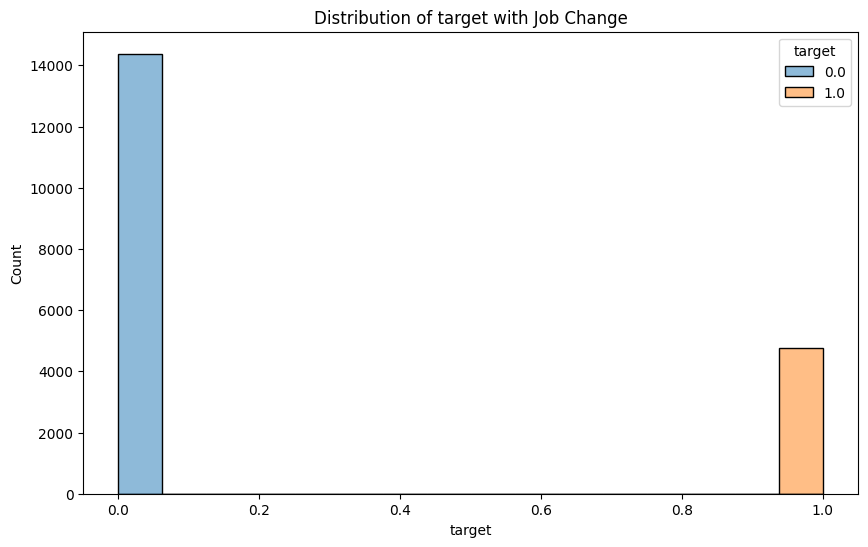

In [30]:
# Explore numerical variables
numerical_columns = data.select_dtypes(exclude=['object']).columns

for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=data, x=column, hue='target', kde=True)
    plt.title(f'Distribution of {column} with Job Change')
    plt.show()

In [33]:
#finding missing values
data.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [34]:
data.nunique()

enrollee_id               19158
city                        123
city_development_index       93
gender                        3
relevent_experience           2
enrolled_university           3
education_level               5
major_discipline              6
experience                   22
company_size                  8
company_type                  6
last_new_job                  6
training_hours              241
target                        2
dtype: int64

In [35]:
# target: 0 – Not looking for job change, 1 – Looking for a job change
sel_status =data["target"].value_counts()
sel_status

0.0    14381
1.0     4777
Name: target, dtype: int64

In [36]:
#formatting relevent_experience for better use and understanding.
data["relevent_experience"].replace(["Has relevent experience", "No relevent experience"],
                             ['Yes','No'],inplace=True)

In [37]:
#formatting company_size for better use and understanding.
data["company_size"].replace(["<10","10/49", "50-99", "100-500", "500-999", "1000-4999", "5000-9999", "10000+"],
                             ["Startup","Small","Small","Medium","Medium","Large","Large","Large"],inplace=True)

##Missing value filling

In [38]:
data.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [39]:
#filling null values
data["gender"].fillna(value="DNM",inplace=True) #Did not mention
data["company_size"].fillna(value="NW",inplace=True) #not working yet
data["company_type"].fillna(value="NW",inplace=True)

data["enrolled_university"].fillna(data["enrolled_university"].mode()[0],inplace=True)
data["education_level"].fillna(data["education_level"].mode()[0],inplace=True)
data["major_discipline"].fillna(data["major_discipline"].mode()[0],inplace =True)
data["experience"].fillna(data["experience"].mode()[0],inplace=True)
data["last_new_job"].fillna(data["last_new_job"].mode()[0],inplace=True)

In [40]:
data.head(20)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Yes,no_enrollment,Graduate,STEM,>20,NW,NW,1,36,1.0
1,29725,city_40,0.776,Male,No,no_enrollment,Graduate,STEM,15,Small,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,DNM,No,Full time course,Graduate,STEM,5,NW,NW,never,83,0.0
3,33241,city_115,0.789,DNM,No,no_enrollment,Graduate,Business Degree,<1,NW,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Yes,no_enrollment,Masters,STEM,>20,Small,Funded Startup,4,8,0.0
5,21651,city_176,0.764,DNM,Yes,Part time course,Graduate,STEM,11,NW,NW,1,24,1.0
6,28806,city_160,0.920,Male,Yes,no_enrollment,High School,STEM,5,Small,Funded Startup,1,24,0.0
7,402,city_46,0.762,Male,Yes,no_enrollment,Graduate,STEM,13,Startup,Pvt Ltd,>4,18,1.0
8,27107,city_103,0.920,Male,Yes,no_enrollment,Graduate,STEM,7,Small,Pvt Ltd,1,46,1.0
9,699,city_103,0.920,DNM,Yes,no_enrollment,Graduate,STEM,17,Large,Pvt Ltd,>4,123,0.0


In [41]:
data.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

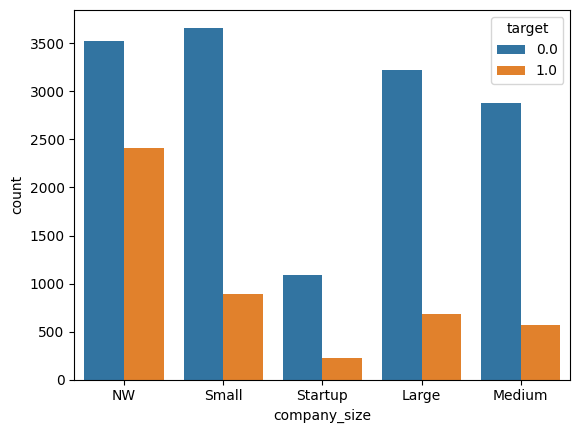

In [42]:
sns.countplot(data=data,x="company_size", hue="target")
plt.savefig("compsize_image.png")

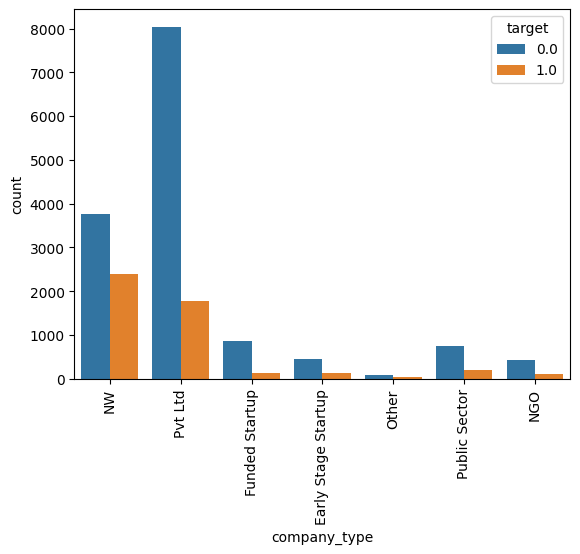

In [43]:
sns.countplot(data=data,x="company_type", hue="target")
plt.xticks(x="company_type", rotation='vertical')
plt.savefig("comptype_image.png")

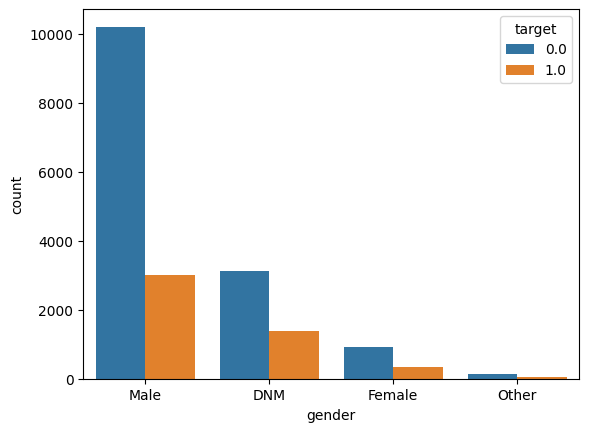

In [44]:
sns.countplot(data=data,x="gender", hue="target")
plt.savefig("gendertype_image.png") #DNM - DidNotMention

In [45]:
# dropping enrollee id and city
data_train=data.drop(['enrollee_id',"city"],axis=1)
data_train.head()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,0.920,Male,Yes,no_enrollment,Graduate,STEM,>20,NW,NW,1,36,1.0
1,0.776,Male,No,no_enrollment,Graduate,STEM,15,Small,Pvt Ltd,>4,47,0.0
2,0.624,DNM,No,Full time course,Graduate,STEM,5,NW,NW,never,83,0.0
3,0.789,DNM,No,no_enrollment,Graduate,Business Degree,<1,NW,Pvt Ltd,never,52,1.0
4,0.767,Male,Yes,no_enrollment,Masters,STEM,>20,Small,Funded Startup,4,8,0.0


##Encoding

In [46]:
data_train["relevent_experience"].unique()

array(['Yes', 'No'], dtype=object)

In [47]:
data_train["last_new_job"].unique()

array(['1', '>4', 'never', '4', '3', '2'], dtype=object)

In [48]:
data_train["education_level"].unique()

array(['Graduate', 'Masters', 'High School', 'Phd', 'Primary School'],
      dtype=object)

In [49]:
data_train["experience"].unique()

array(['>20', '15', '5', '<1', '11', '13', '7', '17', '2', '16', '1', '4',
       '10', '14', '18', '19', '12', '3', '6', '9', '8', '20'],
      dtype=object)

In [50]:
data_train["company_size"].unique()

array(['NW', 'Small', 'Startup', 'Large', 'Medium'], dtype=object)

In [51]:
data["company_size"].value_counts()

NW         5938
Small      4554
Large      3910
Medium     3448
Startup    1308
Name: company_size, dtype: int64

In [52]:
data_train["gender"].unique()

array(['Male', 'DNM', 'Female', 'Other'], dtype=object)

In [53]:
#label encoding
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
data_train["relevent_experience"] = le.fit_transform(data_train["relevent_experience"])
data_train["education_level"] = le.fit_transform(data_train["education_level"])
data_train["experience"] = le.fit_transform(data_train["experience"])
data_train["company_size"] = le.fit_transform(data_train["company_size"])
data_train["last_new_job"] = le.fit_transform(data_train["last_new_job"])
data_train["gender"] = le.fit_transform(data_train["gender"])

In [54]:
data_train["gender"].unique()

array([2, 0, 1, 3])

In [55]:
data_train["education_level"].unique()

array([0, 2, 1, 3, 4])

In [56]:
data_train["experience"].unique()

array([21,  6, 15, 20,  2,  4, 17,  8, 11,  7,  0, 14,  1,  5,  9, 10,  3,
       13, 16, 19, 18, 12])

In [57]:
data_train["company_size"].unique()

array([2, 3, 4, 0, 1])

In [58]:
#one hot encoding
data_train = pd.get_dummies(data_train)
data_train

,city_development_index,gender,relevent_experience,education_level,experience,company_size,last_new_job,training_hours,target,enrolled_university_Full time course,...,major_discipline_No Major,major_discipline_Other,major_discipline_STEM,company_type_Early Stage Startup,company_type_Funded Startup,company_type_NGO,company_type_NW,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd
0,0.920,2,1,0,21,2,0,36,1.0,0,...,0,0,1,0,0,0,1,0,0,0
1,0.776,2,0,0,6,3,4,47,0.0,0,...,0,0,1,0,0,0,0,0,0,1
2,0.624,0,0,0,15,2,5,83,0.0,1,...,0,0,1,0,0,0,1,0,0,0
3,0.789,0,0,0,20,2,5,52,1.0,0,...,0,0,0,0,0,0,0,0,0,1
4,0.767,2,1,2,21,3,3,8,0.0,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,0.878,2,0,0,5,2,0,42,1.0,0,...,0,0,0,0,0,0,1,0,0,0
19154,0.920,2,1,0,5,2,3,52,1.0,0,...,0,0,1,0,0,0,1,0,0,0
19155,0.920,2,1,0,21,3,3,44,0.0,0,...,0,0,1,0,0,0,0,0,0,1
19156,0.802,2,1,1,20,1,1,97,0.0,0,...,0,0,1,0,0,0,0,0,0,1


In [59]:
data_train.columns

Index(['city_development_index', 'gender', 'relevent_experience',
       'education_level', 'experience', 'company_size', 'last_new_job',
       'training_hours', 'target', 'enrolled_university_Full time course',
       'enrolled_university_Part time course',
       'enrolled_university_no_enrollment', 'major_discipline_Arts',
       'major_discipline_Business Degree', 'major_discipline_Humanities',
       'major_discipline_No Major', 'major_discipline_Other',
       'major_discipline_STEM', 'company_type_Early Stage Startup',
       'company_type_Funded Startup', 'company_type_NGO', 'company_type_NW',
       'company_type_Other', 'company_type_Public Sector',
       'company_type_Pvt Ltd'],
      dtype='object')

In [60]:
data_train.shape

(19158, 25)

##Sampling

In [61]:
X = data_train.drop("target",axis=1)
Y = pd.DataFrame(data_train["target"])
Y

,target
0,1.0
1,0.0
2,0.0
3,1.0
4,0.0
...,...
19153,1.0
19154,1.0
19155,0.0
19156,0.0


In [62]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X,Y = smote.fit_resample(X,Y)

1.0    14381
0.0    14381
Name: target, dtype: int64


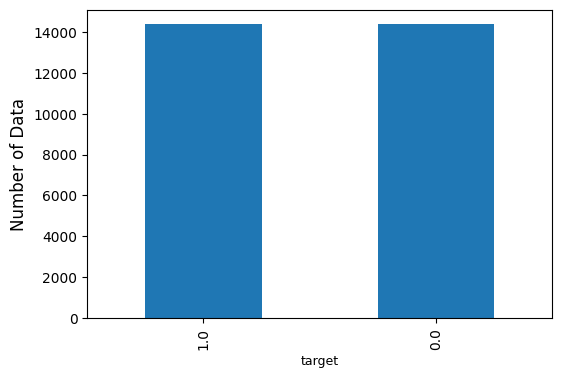

In [63]:
t = Y['target'].value_counts()
plt.figure(figsize=(6,4))
#sns.barplot(t.values,alpha=0.8)
t.plot.bar()
plt.ylabel('Number of Data', fontsize=12)
plt.xlabel('target', fontsize=9)
plt.xticks(rotation=90)
print(t)
plt.show()

##Scaling

In [64]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the data and transform it
scaled_data = scaler.fit_transform(X)

In [65]:
Y= np.squeeze(Y)

##Logistic regression

In [66]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.2, random_state=42,)
X_test_copy = X_test.copy()

In [67]:
from sklearn.linear_model import LogisticRegression

# Create a logistic regression model
logreg_model = LogisticRegression(max_iter=10000)

# Train the model on the training data
logreg_model.fit(X_train, Y_train)

LogisticRegression(max_iter=10000)

In [68]:
log_predictions = logreg_model.predict(X_test)

In [69]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
log_Acc = accuracy_score(Y_test, log_predictions)
precision = precision_score(Y_test, log_predictions)
recall = recall_score(Y_test,log_predictions)
f1 = f1_score(Y_test, log_predictions)
conf_matrix = confusion_matrix(Y_test,log_predictions)

print(f"log_Acc: {log_Acc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

log_Acc: 0.7911
Precision: 0.8316
Recall: 0.7298
F1 Score: 0.7774
Confusion Matrix:
[[2452  425]
 [ 777 2099]]


##Decision Tree

In [70]:
from sklearn.tree import DecisionTreeClassifier

# Create a decision tree model
dt_model = DecisionTreeClassifier()

# Train the model on the training data
dt_model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [71]:
dt_model_predictions = dt_model.predict(X_test)

In [72]:
dt_Acc = accuracy_score(Y_test, dt_model_predictions)
precision = precision_score(Y_test, dt_model_predictions)
recall = recall_score(Y_test,dt_model_predictions)
f1 = f1_score(Y_test, dt_model_predictions)
conf_matrix = confusion_matrix(Y_test,dt_model_predictions)

print(f"dt_Acc: {dt_Acc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

dt_Acc: 0.7699
Precision: 0.7656
Recall: 0.7778
F1 Score: 0.7716
Confusion Matrix:
[[2192  685]
 [ 639 2237]]


##svm

In [73]:
from sklearn.svm import SVC

# Create an SVM model
svm_model = SVC()

# Train the model on the training data
svm_model.fit(X_train, Y_train)

SVC()

In [74]:
svm_model_predictions = svm_model.predict(X_test)

In [76]:
svm_Acc = accuracy_score(Y_test, svm_model_predictions)
precision = precision_score(Y_test, svm_model_predictions)
recall = recall_score(Y_test,svm_model_predictions)
f1 = f1_score(Y_test, svm_model_predictions)
conf_matrix = confusion_matrix(Y_test,svm_model_predictions)

print(f"svm_Acc: {svm_Acc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

svm_Acc: 0.6697
Precision: 0.6870
Recall: 0.6234
F1 Score: 0.6537
Confusion Matrix:
[[2060  817]
 [1083 1793]]


##Random Forest

In [77]:
# Train the Random Forest model
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
model=rf_model.fit(X_train, Y_train)
# Make predictions on the test set

In [78]:
rf_predictions= rf_model.predict(X_test)

In [79]:
rf_Acc = accuracy_score(Y_test, rf_predictions)
precision = precision_score(Y_test, rf_predictions)
recall = recall_score(Y_test,rf_predictions)
f1 = f1_score(Y_test, rf_predictions)
conf_matrix = confusion_matrix(Y_test,rf_predictions)

print(f"rf_Acc: {rf_Acc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

rf_Acc: 0.8338
Precision: 0.8399
Recall: 0.8248
F1 Score: 0.8323
Confusion Matrix:
[[2425  452]
 [ 504 2372]]


#knn

In [80]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=1)  # You can choose the value of k (number of neighbors)
knn_model.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=1)

In [81]:
knn_predictions = knn_model.predict(X_test)

In [82]:
knn_Acc = accuracy_score(Y_test, knn_predictions)
conf_matrix = confusion_matrix(Y_test, knn_predictions)
class_report = classification_report(Y_test, knn_predictions)
f1 = f1_score(Y_test, knn_predictions)
recall = recall_score(Y_test,knn_predictions)
precision = precision_score(Y_test, knn_predictions)

print(f"knn_Acc: {knn_Acc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

knn_Acc: 0.8038
Precision: 0.7525
Recall: 0.9051
F1 Score: 0.8218
Confusion Matrix:
[[2021  856]
 [ 273 2603]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.70      0.78      2877
         1.0       0.75      0.91      0.82      2876

    accuracy                           0.80      5753
   macro avg       0.82      0.80      0.80      5753
weighted avg       0.82      0.80      0.80      5753



##XGB

In [83]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, Y_train)
xgb_predictions = xgb_model.predict(X_test)


In [84]:
xgb_Acc = accuracy_score(Y_test, xgb_predictions)
precision = precision_score(Y_test, xgb_predictions)
recall = recall_score(Y_test,xgb_predictions)
f1 = f1_score(Y_test, xgb_predictions)
conf_matrix = confusion_matrix(Y_test, xgb_predictions)
class_report = classification_report(Y_test, xgb_predictions)




print(f"xgb_Acc: {xgb_Acc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

xgb_Acc: 0.8427
Precision: 0.8428
Recall: 0.8425
F1 Score: 0.8426
Confusion Matrix:
[[2425  452]
 [ 453 2423]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.84      0.84      2877
         1.0       0.84      0.84      0.84      2876

    accuracy                           0.84      5753
   macro avg       0.84      0.84      0.84      5753
weighted avg       0.84      0.84      0.84      5753



##Comparing model Accuracy

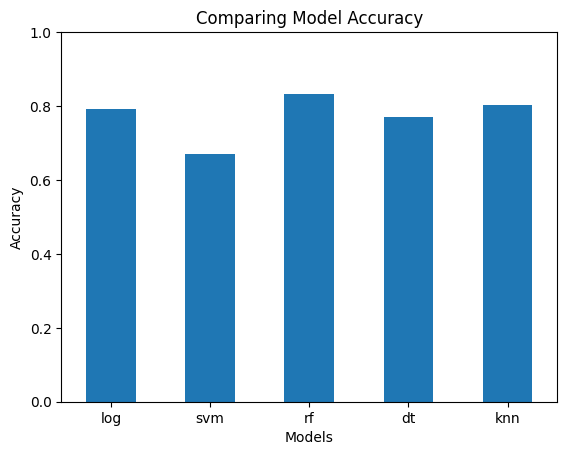

In [85]:
pd.DataFrame([log_Acc,svm_Acc,rf_Acc,dt_Acc,knn_Acc]).plot.bar();
plt.xticks(np.arange(5),('log','svm','rf','dt','knn'))
plt.legend().remove()
plt.ylim(0,1)
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.xticks(rotation = 0)
plt.title('Comparing Model Accuracy');

In [86]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   city_development_index                19158 non-null  float64
 1   gender                                19158 non-null  int64  
 2   relevent_experience                   19158 non-null  int64  
 3   education_level                       19158 non-null  int64  
 4   experience                            19158 non-null  int64  
 5   company_size                          19158 non-null  int64  
 6   last_new_job                          19158 non-null  int64  
 7   training_hours                        19158 non-null  int64  
 8   target                                19158 non-null  float64
 9   enrolled_university_Full time course  19158 non-null  uint8  
 10  enrolled_university_Part time course  19158 non-null  uint8  
 11  enrolled_univer

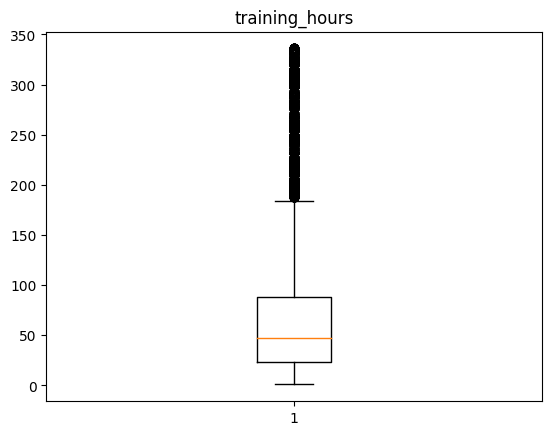

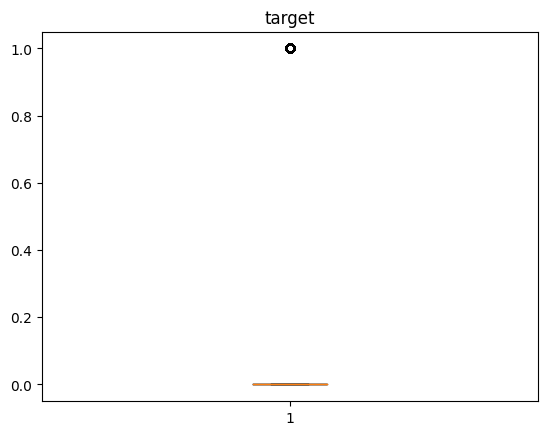

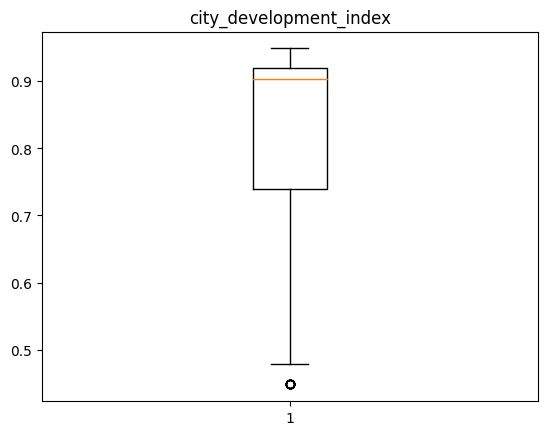

In [87]:
num_cols=['training_hours','target','city_development_index']
for i in num_cols:
    plt.figure()
    plt.boxplot(data_train[i])
    plt.title(i)

In [88]:
data_train.corr()

,city_development_index,gender,relevent_experience,education_level,experience,company_size,last_new_job,training_hours,target,enrolled_university_Full time course,...,major_discipline_No Major,major_discipline_Other,major_discipline_STEM,company_type_Early Stage Startup,company_type_Funded Startup,company_type_NGO,company_type_NW,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd
city_development_index,1.000000,0.152961,0.059808,0.070530,0.035405,-0.077914,0.022741,0.001920,-0.341665,-0.161016,...,0.019018,-0.000797,-0.102510,-0.051432,0.034560,0.023154,-0.071801,0.015417,0.060069,0.033483
gender,0.152961,1.000000,0.103032,-0.017834,0.001908,-0.023770,0.030432,-0.002380,-0.076416,-0.085064,...,0.012522,-0.004727,-0.006634,-0.022683,0.037028,-0.003857,-0.060580,-0.004169,-0.017949,0.057728
relevent_experience,0.059808,0.103032,1.000000,-0.062577,0.008290,-0.029983,-0.170767,0.011566,-0.128430,-0.369085,...,-0.004920,-0.011061,0.015727,0.049863,0.096309,-0.007198,-0.359494,0.015981,-0.069175,0.305266
education_level,0.070530,-0.017834,-0.062577,1.000000,0.016333,-0.035450,0.069009,-0.013175,-0.083908,-0.053612,...,-0.046812,-0.013428,0.034929,-0.000564,-0.015869,0.024707,0.014637,-0.010223,0.073536,-0.044841
experience,0.035405,0.001908,0.008290,0.016333,1.000000,-0.019560,0.060750,-0.005260,-0.006464,-0.015032,...,0.003888,0.003500,-0.005835,-0.012462,-0.008718,0.011214,0.029917,0.001989,0.001444,-0.024290
company_size,-0.077914,-0.023770,-0.029983,-0.035450,-0.019560,1.000000,-0.043161,0.016444,0.041700,0.058576,...,0.007528,0.006339,-0.009111,0.236664,0.158549,-0.052179,0.111991,-0.012600,-0.117596,-0.187632
last_new_job,0.022741,0.030432,-0.170767,0.069009,0.060750,-0.043161,1.000000,-0.008574,-0.024990,0.010478,...,0.008192,-0.006631,0.014400,-0.070740,-0.111613,-0.026827,0.114240,-0.001463,-0.008263,-0.019698
training_hours,0.001920,-0.002380,0.011566,-0.013175,-0.005260,0.016444,-0.008574,1.000000,-0.021577,-0.006863,...,-0.004382,0.001620,0.003296,0.012374,0.006373,0.006930,-0.003365,0.004823,-0.012649,-0.001530
target,-0.341665,-0.076416,-0.128430,-0.083908,-0.006464,0.041700,-0.024990,-0.021577,1.000000,0.150171,...,-0.000680,0.006048,0.010221,-0.005775,-0.059421,-0.024412,0.220533,-0.001783,-0.015593,-0.162408
enrolled_university_Full time course,-0.161016,-0.085064,-0.369085,-0.053612,-0.015032,0.058576,0.010478,-0.006863,0.150171,1.000000,...,-0.030313,-0.013857,0.090014,0.003575,-0.061618,-0.000138,0.222242,-0.004528,0.038490,-0.197302


In [89]:
# Plotly code to make a heatmap
import plotly.graph_objects as go
x=list(data_train.corr().columns)
y=list(data_train.corr().index)
values=np.array(data_train.corr().values)

fig = go.Figure(data=go.Heatmap(
    z=values,
    x=x,
    y=y,hoverongaps = False))
fig.update_layout(
    title={
        'text': "Correlation between features",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

<Axes: >

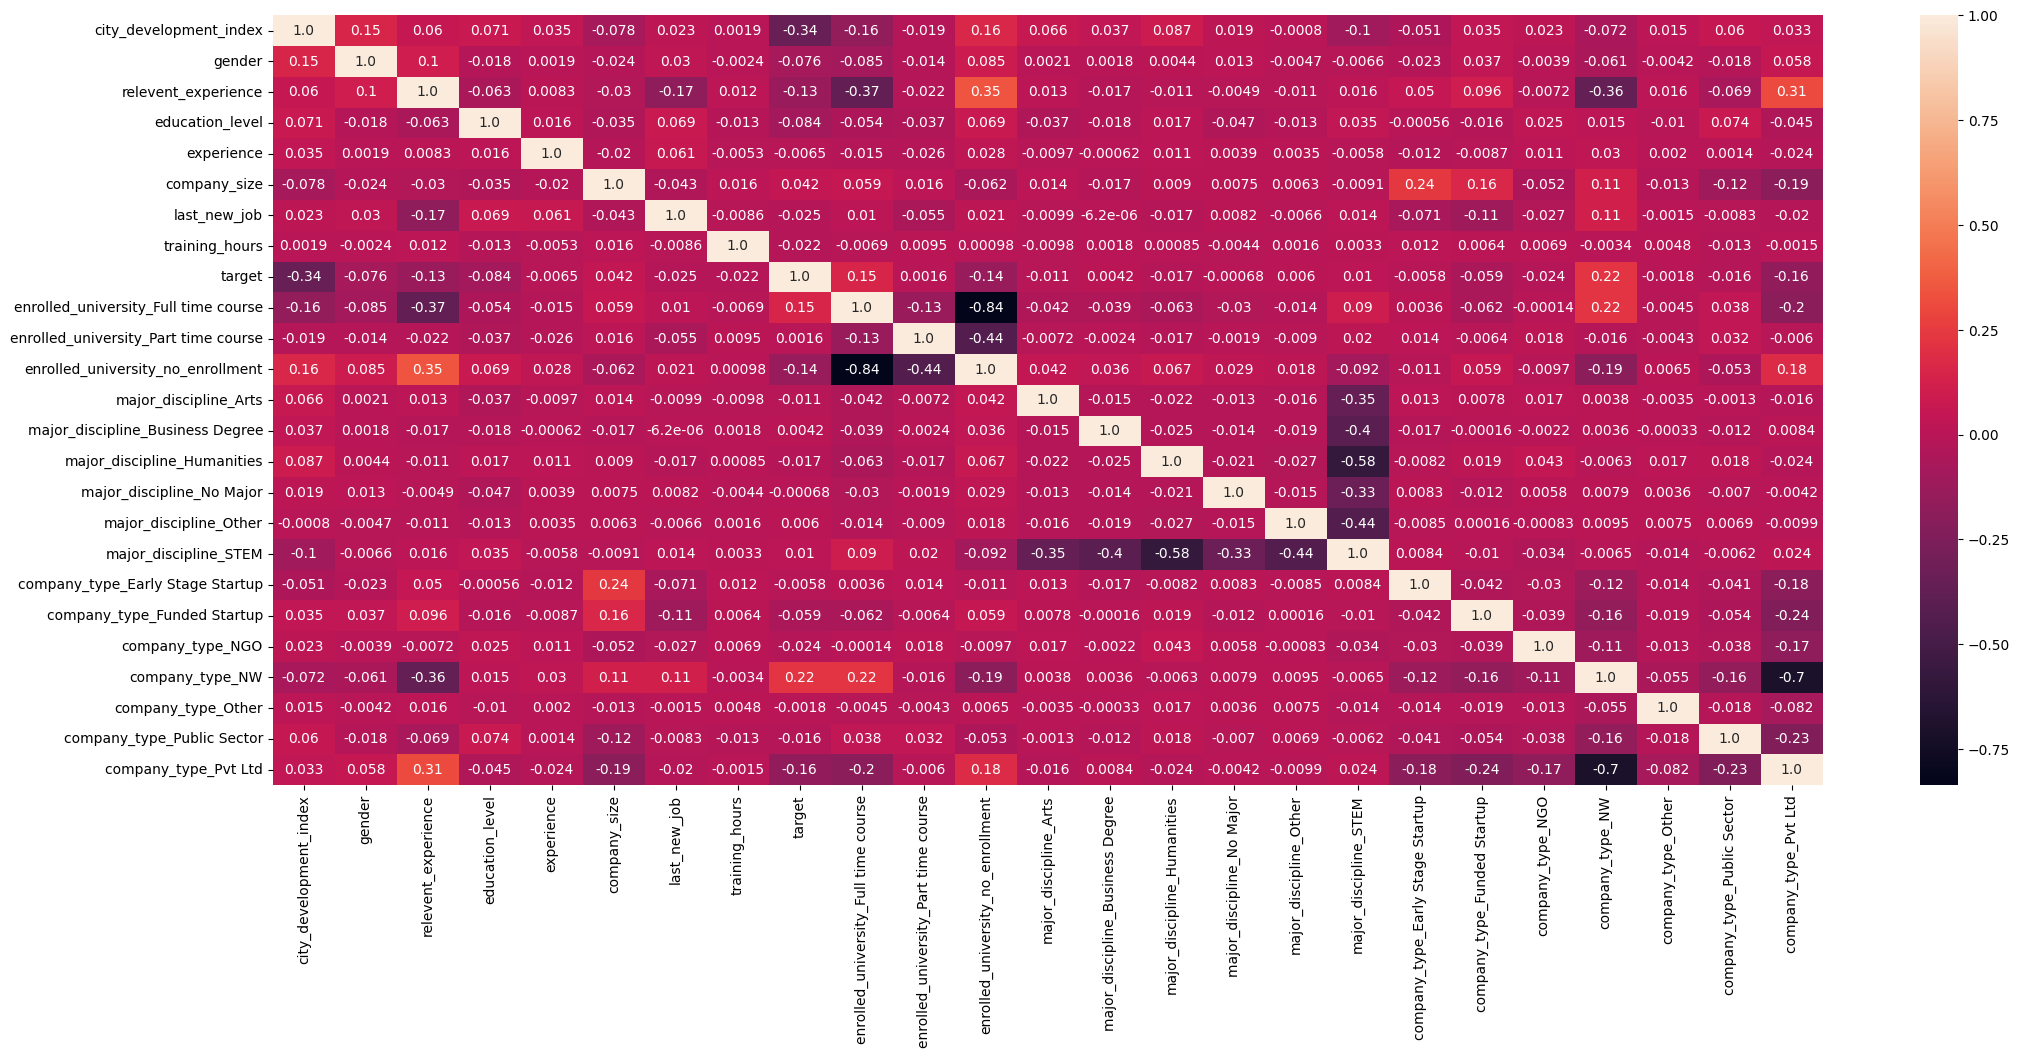

In [90]:
corr = data_train.corr()
plt.figure(figsize=(25,10))
sns.heatmap(corr,annot=True,fmt='.2')

In [91]:
data_train.describe()

,city_development_index,gender,relevent_experience,education_level,experience,company_size,last_new_job,training_hours,target,enrolled_university_Full time course,...,major_discipline_No Major,major_discipline_Other,major_discipline_STEM,company_type_Early Stage Startup,company_type_Funded Startup,company_type_NGO,company_type_NW,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd
count,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,...,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000
mean,0.828848,1.474736,0.719908,0.689686,12.942635,1.786095,1.746268,65.366896,0.249348,0.196106,...,0.011640,0.019887,0.903278,0.031475,0.052250,0.027195,0.320493,0.006316,0.049849,0.512423
std,0.123362,0.860205,0.449056,0.995951,6.607340,1.208913,1.935640,60.058462,0.432647,0.397060,...,0.107262,0.139617,0.295587,0.174602,0.222536,0.162655,0.466678,0.079223,0.217638,0.499859
min,0.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.740000,1.000000,0.000000,0.000000,7.000000,1.000000,0.000000,23.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.903000,2.000000,1.000000,0.000000,14.000000,2.000000,1.000000,47.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.920000,2.000000,1.000000,2.000000,19.000000,3.000000,4.000000,88.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,0.949000,3.000000,1.000000,4.000000,21.000000,4.000000,5.000000,336.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##TEST DATA

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [95]:
# Display the first few rows of the test dataset
test=pd.read_csv('aug_test.csv')
test.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


In [96]:
# Display the last few rows of the test dataset
test.tail()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
2124,1289,city_103,0.920,Male,No relevent experience,no_enrollment,Graduate,Humanities,16,NaN,Public Sector,4,15
2125,195,city_136,0.897,Male,Has relevent experience,no_enrollment,Masters,STEM,18,NaN,NaN,2,30
2126,31762,city_100,0.887,Male,No relevent experience,no_enrollment,Primary School,NaN,3,NaN,Pvt Ltd,never,18
2127,7873,city_102,0.804,Male,Has relevent experience,Full time course,High School,NaN,7,100-500,Public Sector,1,84
2128,12215,city_102,0.804,Male,Has relevent experience,no_enrollment,Masters,STEM,15,10000+,Pvt Ltd,2,11


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             2129 non-null   int64  
 1   city                    2129 non-null   object 
 2   city_development_index  2129 non-null   float64
 3   gender                  1621 non-null   object 
 4   relevent_experience     2129 non-null   object 
 5   enrolled_university     2098 non-null   object 
 6   education_level         2077 non-null   object 
 7   major_discipline        1817 non-null   object 
 8   experience              2124 non-null   object 
 9   company_size            1507 non-null   object 
 10  company_type            1495 non-null   object 
 11  last_new_job            2089 non-null   object 
 12  training_hours          2129 non-null   int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 216.4+ KB


In [5]:
test.shape

(2129, 13)

In [6]:
test.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours'],
      dtype='object')

In [7]:
test.isna().sum()

enrollee_id                 0
city                        0
city_development_index      0
gender                    508
relevent_experience         0
enrolled_university        31
education_level            52
major_discipline          312
experience                  5
company_size              622
company_type              634
last_new_job               40
training_hours              0
dtype: int64

In [8]:
test.describe()

,enrollee_id,city_development_index,training_hours
count,2129.000000,2129.000000,2129.000000
mean,16861.614843,0.824984,64.983091
std,9576.846029,0.125074,60.238660
min,3.000000,0.448000,1.000000
25%,8562.000000,0.698000,23.000000
50%,16816.000000,0.903000,47.000000
75%,25129.000000,0.920000,86.000000
max,33353.000000,0.949000,334.000000


In [97]:
#formatting company_size for better use and understanding.
test['company_size'].replace(['<10','10/49', '50-99', '100-500', '500-999', '1000-4999', '5000-9999', '10000+'],
                             ['Startup','Small','Small','Medium','Medium','Large','Large','Large'],inplace=True)

In [98]:
#formatting relevent_experience for better use and understanding.
test["relevent_experience"].replace(["Has relevent experience", "No relevent experience"],
                             ['Yes','No'],inplace=True)

In [99]:
#formatting last_new_job for better use and understanding.
test["last_new_job"].replace(["never"],["0"],inplace=True)

In [100]:
#filling null values
test["gender"].fillna(value="DNM",inplace=True) #Did not mention
test["company_size"].fillna(value="NW",inplace=True) #not working yet
test["company_type"].fillna(value="NW",inplace=True)

test["enrolled_university"].fillna(test["enrolled_university"].mode()[0],inplace=True)
test["education_level"].fillna(test["education_level"].mode()[0],inplace=True)
test["major_discipline"].fillna(test["major_discipline"].mode()[0],inplace =True)
test["experience"].fillna(test["experience"].mode()[0],inplace=True)
test["last_new_job"].fillna(test["last_new_job"].mode()[0],inplace=True)

In [13]:
test.isna().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
dtype: int64

In [14]:
test["major_discipline"].value_counts()

STEM               1933
Humanities           80
Other                40
Business Degree      37
No Major             22
Arts                 17
Name: major_discipline, dtype: int64

In [15]:
test["company_size"].value_counts()

NW         622
Small      510
Large      428
Medium     406
Startup    163
Name: company_size, dtype: int64

In [16]:
test["company_type"].value_counts()

Pvt Ltd                1141
NW                      634
Public Sector           127
Funded Startup           97
Early Stage Startup      65
NGO                      53
Other                    12
Name: company_type, dtype: int64

In [101]:
# dropping enrollee id and city
Z= test.drop(['enrollee_id',"city"],axis=1)
Z

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,0.827,Male,Yes,Full time course,Graduate,STEM,9,Startup,NW,1,21
1,0.920,Female,Yes,no_enrollment,Graduate,STEM,5,NW,Pvt Ltd,1,98
2,0.624,Male,No,no_enrollment,High School,STEM,<1,NW,Pvt Ltd,0,15
3,0.827,Male,Yes,no_enrollment,Masters,STEM,11,Small,Pvt Ltd,1,39
4,0.920,Male,Yes,no_enrollment,Graduate,STEM,>20,Large,Pvt Ltd,>4,72
...,...,...,...,...,...,...,...,...,...,...,...
2124,0.920,Male,No,no_enrollment,Graduate,Humanities,16,NW,Public Sector,4,15
2125,0.897,Male,Yes,no_enrollment,Masters,STEM,18,NW,NW,2,30
2126,0.887,Male,No,no_enrollment,Primary School,STEM,3,NW,Pvt Ltd,0,18
2127,0.804,Male,Yes,Full time course,High School,STEM,7,Medium,Public Sector,1,84


In [102]:
#label encoding
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
Z["relevent_experience"] = le.fit_transform(Z["relevent_experience"])
Z["education_level"] = le.fit_transform(Z["education_level"])
Z["experience"] = le.fit_transform(Z["experience"])
Z["company_size"] = le.fit_transform(Z["company_size"])
Z["last_new_job"] = le.fit_transform(Z["last_new_job"])
Z["gender"] = le.fit_transform(Z["gender"])


In [103]:
#one hot encoding
Z = pd.get_dummies(Z)
Z.head()

,city_development_index,gender,relevent_experience,education_level,experience,company_size,last_new_job,training_hours,enrolled_university_Full time course,enrolled_university_Part time course,...,major_discipline_No Major,major_discipline_Other,major_discipline_STEM,company_type_Early Stage Startup,company_type_Funded Startup,company_type_NGO,company_type_NW,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd
0,0.827,2,1,0,19,4,1,21,1,0,...,0,0,1,0,0,0,1,0,0,0
1,0.920,1,1,0,15,2,1,98,0,0,...,0,0,1,0,0,0,0,0,0,1
2,0.624,2,0,1,20,2,0,15,0,0,...,0,0,1,0,0,0,0,0,0,1
3,0.827,2,1,2,2,3,1,39,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0.920,2,1,0,21,0,5,72,0,0,...,0,0,1,0,0,0,0,0,0,1


In [20]:
Z.shape

(2129, 24)

In [21]:
Z.describe()

,city_development_index,gender,relevent_experience,education_level,experience,company_size,last_new_job,training_hours,enrolled_university_Full time course,enrolled_university_Part time course,...,major_discipline_No Major,major_discipline_Other,major_discipline_STEM,company_type_Early Stage Startup,company_type_Funded Startup,company_type_NGO,company_type_NW,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd
count,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,...,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000
mean,0.824984,1.469704,0.715829,0.713950,13.139032,1.799906,1.995303,64.983091,0.204321,0.067637,...,0.010333,0.018788,0.907938,0.030531,0.045561,0.024894,0.297792,0.005636,0.059652,0.535932
std,0.125074,0.865563,0.451125,1.012793,6.596338,1.225274,1.642646,60.238660,0.403300,0.251182,...,0.101151,0.135808,0.289181,0.172083,0.208581,0.155840,0.457395,0.074882,0.236897,0.498824
min,0.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.698000,1.000000,0.000000,0.000000,8.000000,1.000000,1.000000,23.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.903000,2.000000,1.000000,0.000000,15.000000,2.000000,1.000000,47.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.920000,2.000000,1.000000,2.000000,19.000000,3.000000,3.000000,86.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,0.949000,3.000000,1.000000,4.000000,21.000000,4.000000,5.000000,334.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [104]:
scaler_x = MinMaxScaler()
Z= scaler_x.fit_transform(Z)

In [105]:
pred_test = rf_model.predict(Z)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



In [106]:
submission = pd.read_csv("sample_submission.csv")
submission

,enrollee_id,target
0,32403,0.5
1,9858,0.5
2,31806,0.5
3,27385,0.5
4,27724,0.5
...,...,...
2124,1289,0.5
2125,195,0.5
2126,31762,0.5
2127,7873,0.5


In [107]:
submission['enrollee_id']=test['enrollee_id']
submission['target']=pred_test
submission['target']

0       0.0
1       0.0
2       1.0
3       0.0
4       0.0
       ... 
2124    0.0
2125    0.0
2126    1.0
2127    0.0
2128    1.0
Name: target, Length: 2129, dtype: float64

In [108]:
submission['target'].replace(0.0,'Not looking for Job change',inplace=True)
submission['target'].replace(1.0,'Looking for Job change',inplace=True)
submission['target']

0       Not looking for Job change
1       Not looking for Job change
2           Looking for Job change
3       Not looking for Job change
4       Not looking for Job change
                   ...            
2124    Not looking for Job change
2125    Not looking for Job change
2126        Looking for Job change
2127    Not looking for Job change
2128        Looking for Job change
Name: target, Length: 2129, dtype: object